 # PTSD Mouse Data

 The data under analysis consists of two data sets, describing 20 different mice at 4 timepoints each: Baseline, Pre-fear, Fear, and 9 days later (D9). 10 of these mice are seratonin transporter knockouts (KO) and 10 are wildtype (WT).

 The data are:
 - 79 MRIs. The pre-fear, fear, and D9 images are MN(II) enhanced (MEMRI). As I understand it, the MEMRI images are used to measure neuronal functioning - (when neurons are active, their uptake of MN(II) is increased?). The baseline images, which are regular fMRI, are
 - 79 measurements of percent time spent in the light by the mice.

 In both data sets, the KO_04_D9 datapoint is missing (hence 79 instead of 80).

In [8]:
# Import needed packages for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 # Response Data

 79 measurements of percent time spent in the light by the mice.

 The data
 - formatted as a .csv file
 - contains no missing fields
 - Noteworthy: the ID numbering for the animals goes from 3-12, both for KO and WT mice.
 - the Animal_numbers repeat betwen KO and WT, but refer to distinct animals

 -percent values vary between 0.0 and 1.0. I did not find any abnormal values

In [18]:
###########READ IN Y DATA ############ 

Y = pd.read_csv('PTSD_Data_Share\Behavior_data\PTSD_PerLight.csv')

#split ID into one column for each variable 
new = Y["Animal ID"].str.split("_", n=3, expand=True)
Y[ "Genotype"] = new[1]
Y["Animal_Number"] = new[2]
Y["Timepoint"] = new[3]


#check for NaNs - dont find any
print(Y.isnull().values.any())

Y

False


,Animal ID,PerLight,Genotype,Animal_Number,Timepoint
0,PTSD_KO_03_BL,0.676965,KO,03,BL
1,PTSD_KO_03_PreF,0.159753,KO,03,PreF
2,PTSD_KO_03_Fear,0.280408,KO,03,Fear
3,PTSD_KO_03_D9,0.358919,KO,03,D9
4,PTSD_KO_04_BL,0.326555,KO,04,BL
...,...,...,...,...,...
74,PTSD_WT_11_D9,0.403257,WT,11,D9
75,PTSD_WT_12_BL,0.350375,WT,12,BL
76,PTSD_WT_12_PreF,0.273996,WT,12,PreF
77,PTSD_WT_12_Fear,0.243884,WT,12,Fear


## Things I did: 
- Added an additional column with ID that is distinct for all animals (0-19)

- Created a copy of the dataset, `Y_na` that contains a row for KO_04_D9 (the missing data point) (this makes some of the graphing steps easier)


In [19]:
################ PROCESSING Y DATA ##################
#function to assign unique id number to each animal 
# so that ID numbers don't repeat between two animals 
# (the new id numbers go 0-19)
def assign_id(row): 
    if row['Genotype'] == "WT": 
        index = 10
    elif row['Genotype'] == "KO": 
        index = 0 
    index += int(row["Animal_Number"]) - 3 
    return index 

# create new column in dataframe
Y["ID"] = Y.apply(assign_id, axis=1)

# drop old ID column 
Y.drop(columns='Animal ID')

#reorder columns 
Y = Y.reindex(columns = ["ID", "Genotype", "Animal_Number", "Timepoint", "PerLight"])

# add an entry for KO_04_D9 (the missing point) to make other operations easier
KO_04_D9_row = {"ID": 1, "Genotype": "KO", "Animal_Number": "04", "Timepoint": "D9", "PerLight": np.NAN}
Y_na = Y.append(KO_04_D9_row, ignore_index=True)
 
# Data after formatting done
Y

,ID,Genotype,Animal_Number,Timepoint,PerLight
0,0,KO,03,BL,0.676965
1,0,KO,03,PreF,0.159753
2,0,KO,03,Fear,0.280408
3,0,KO,03,D9,0.358919
4,1,KO,04,BL,0.326555
...,...,...,...,...,...
74,18,WT,11,D9,0.403257
75,19,WT,12,BL,0.350375
76,19,WT,12,PreF,0.273996
77,19,WT,12,Fear,0.243884


In [24]:
Y_na

,ID,Genotype,Animal_Number,Timepoint,PerLight
0,0,KO,03,BL,0.676965
1,0,KO,03,PreF,0.159753
2,0,KO,03,Fear,0.280408
3,0,KO,03,D9,0.358919
4,1,KO,04,BL,0.326555
...,...,...,...,...,...
75,19,WT,12,BL,0.350375
76,19,WT,12,PreF,0.273996
77,19,WT,12,Fear,0.243884
78,19,WT,12,D9,0.377567


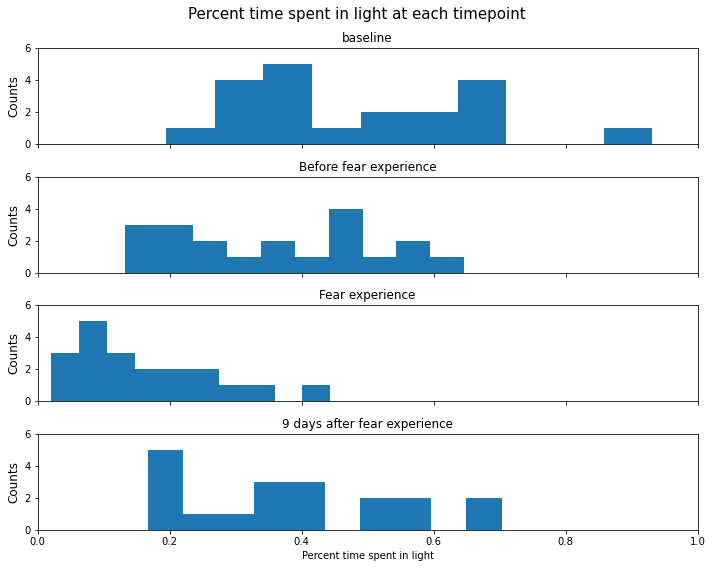

In [20]:
full_name = {"BL": "baseline", "PreF": "Before fear experience", "Fear": "Fear experience", "D9": "9 days after fear experience"}

fig, ax = plt.subplots(nrows=4, ncols=1, squeeze=False, figsize=(10, 8), sharex=True)
fig.suptitle("Percent time spent in light at each timepoint", fontsize=15)
timepoints = Y.Timepoint.unique()
for n, timepoint in enumerate(timepoints):
    ax[n, 0].hist(Y.loc[Y_na.Timepoint == timepoint]["PerLight"])
    ax[n, 0].title.set_text(full_name[timepoint])
    ax[n, 0].set_ylim(0, 6)
    ax[n, 0].set_ylabel("Counts", fontsize=12)

ax[3, 0].set_xlim(0, 1)
ax[3, 0].set_xlabel("Percent time spent in light")
plt.tight_layout()
plt.show()   


The above plot shows the frequency distribution for the percent time spent in the light across each time point. Immediately after the fear experience, the mice spend far more time in the dark. At other timepoints, there is not a clear difference. 

The next two graphs show the same data, but tracking each individual mouse across time

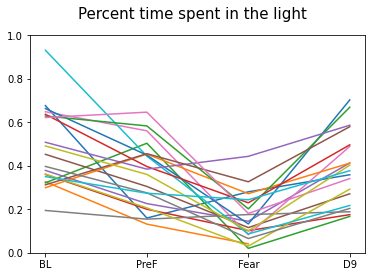

In [21]:
timepoints = ['BL', 'PreF', 'Fear', 'D9']

fig, ax = plt.subplots()
for i in pd.unique(Y_na.ID):
    ax.plot(timepoints, Y_na.loc[(Y_na.ID==i), "PerLight"], label=str(Y_na.ID))
fig.suptitle("Percent time spent in the light", fontsize=15)
ax.set_ylim(0, 1)
fig.show()


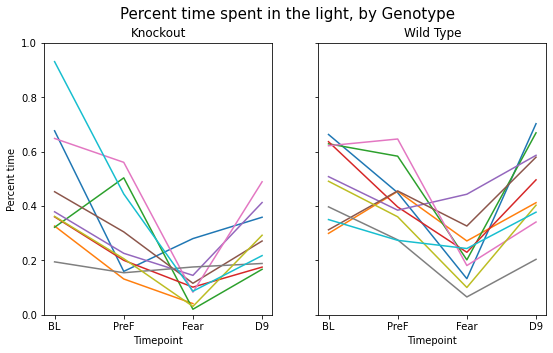

In [22]:

timepoints = ['BL', 'PreF', 'Fear', 'D9']
fig, ax = plt.subplots(1, 2, figsize=(9, 5), sharey=True)
for i in range(20): 
    #plot KO subplot
    selection1 = Y_na.loc[(Y_na.ID==i) & (Y_na.Genotype=="KO"), "PerLight"]
    if not selection1.empty: 
        ax[0].plot(timepoints, selection1, label=str(Y_na.ID))
    #plot WT subplot
    selection2 = Y_na.loc[(Y_na.ID==i) & (Y_na.Genotype=="WT"), "PerLight"]
    if not selection2.empty: 
        ax[1].plot(timepoints, selection2, label=str(Y_na.ID))

ax[0].set_ylim(0, 1)
ax[0].set_title("Knockout")
ax[1].set_title("Wild Type")
ax[0].set_ylabel("Percent time")
ax[0].set_xlabel("Timepoint")
ax[1].set_xlabel("Timepoint")
fig.suptitle("Percent time spent in the light, by Genotype", fontsize=15)
fig.show()


One mouse in each genotype group (dark blue in KO and puple in WT) seems to spend more time in the light after the fear exposure. I am surprised by this behavior. Otherwise, each mouse generally spends more time in the light before and 9 days after fear, and less time immediately after fear.

In [23]:
# save dataframes 
Y.to_pickle('Y.pkl')
Y_na.to_pickle('Y_na.pkl')